In [95]:
import numpy as np
import pandas as pd, datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [96]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
quarters = ['Q1','Q2','Q3','Q4']
n = df['Quarter'][0]
n[0:2]
df['quarter'] = 0
for i in range(42):
    n = df['Quarter'][i]
    df['quarter'][i] = n[0:2]

C:\Users\Tripti\AppData\Local\Temp/ipykernel_9364/3322622180.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i] = n[0:2]
C:\Users\Tripti\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [97]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


# Visualisation

C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


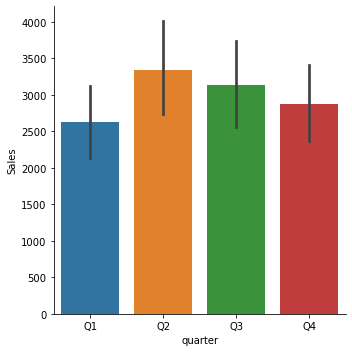

In [98]:
sns.factorplot("quarter","Sales",data=df,kind="bar")

C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

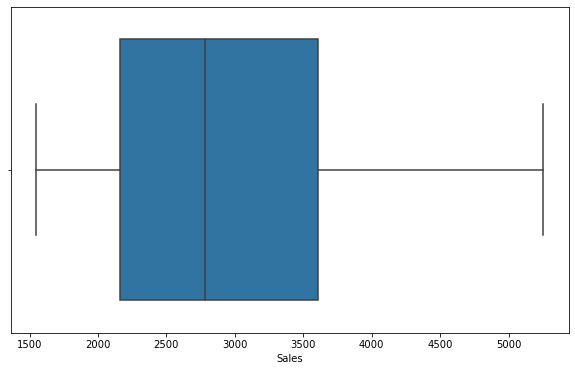

In [99]:
sns.boxplot("Sales",data=df)

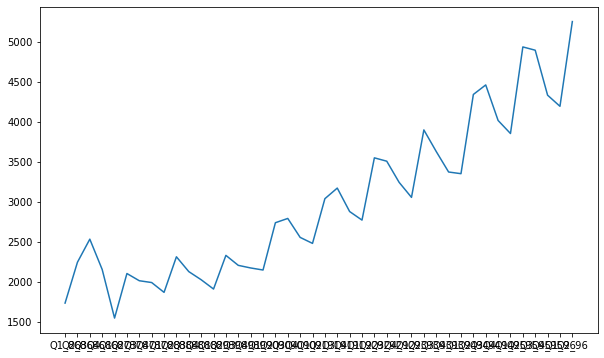

In [100]:
y=np.array(df.Sales)
plt.plot(df.Quarter,y)

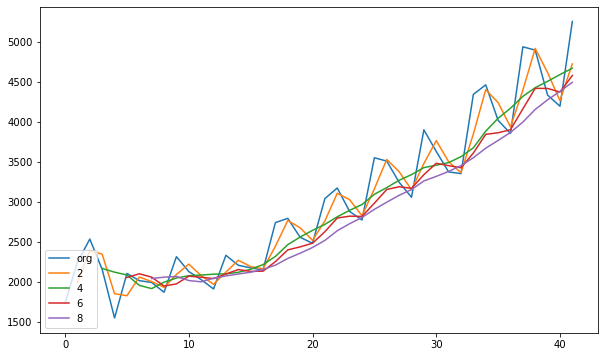

In [101]:
df.Sales.plot(label="org")
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [102]:
indexeddf = df.drop(['Quarter'], axis=1)
rolmean= indexeddf.rolling(window=4).mean()
rolstd= indexeddf.rolling(window=4).std()
print(rolmean,rolstd)

          Sales
0           NaN
1           NaN
2           NaN
3   2167.138997
4   2120.386996
5   2085.249745
6   1955.389247
7   1914.585247
8   1994.892998
9   2047.197998
10  2075.687248
11  2084.457748
12  2094.846248
13  2099.229497
14  2118.786996
15  2155.571745
16  2214.990246
17  2317.025997
18  2463.576998
19  2559.087498
20  2642.261497
21  2717.315247
22  2812.155746
23  2892.903498
24  2965.659998
25  3093.279249
26  3177.250250
27  3268.464998
28  3339.464998
29  3426.714998
30  3456.964998
31  3489.250000
32  3563.250000
33  3674.000000
34  3882.000000
35  4043.000000
36  4168.500000
37  4317.000000
38  4425.500000
39  4504.500000
40  4589.500000
41  4668.750000          Sales
0          NaN
1          NaN
2          NaN
3   330.425047
4   414.512861
5   406.308893
6   277.866199
7   249.306513
8    96.987713
9   188.747393
10  190.729152
11  186.338674
12  170.840324
13  178.383242
14  186.729030
15  176.804403
16   81.037355
17  282.529358
18  350.081855
19  292.0350

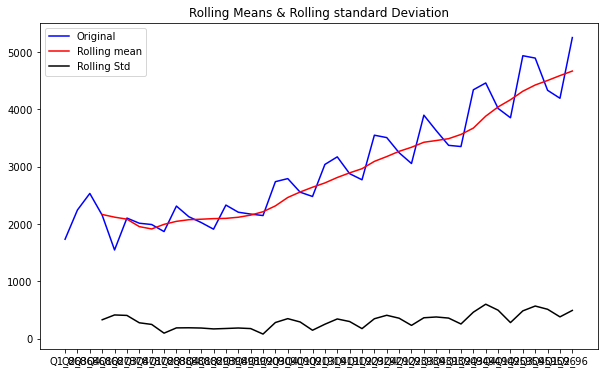

In [103]:
# Plotting rolling Statistics

orig = plt.plot(df.Quarter,df.Sales,color='blue', label='Original')
mean = plt.plot(rolmean,color='red', label='Rolling mean')
std = plt.plot(rolstd,color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Means & Rolling standard Deviation')
plt.show(block=False)

From the graph we can see that the rolling std line is almost parallel to the 
x-axis but the red line that is the rolling mean line is not at all parallel to the x-axis. So this time-series is not stationary. Hence we will perform the ADCF test.

In [104]:
#Performing Augmented Dickey-Fuller Test (ADCF):
print("Results of dickey Fuller Test:")
dftest=adfuller(indexeddf['Sales'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
 dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)


Results of dickey Fuller Test:
Test Statistics                 1.309421
p-value                         0.996661
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


Here the p-value is not low according to the null hypothesis and the critical values at 1%, 5%, 10% confidence intervals are nowhere near to the test statistics. Thus we can say that our Time Series at the moment is not stationary

# Data Transformation to achieve Stationarity

# Log Scale Transformation 

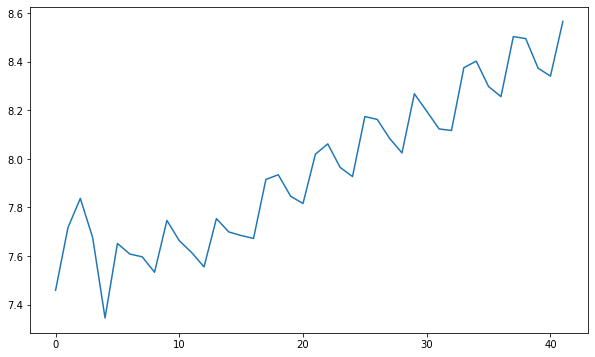

In [105]:
indexeddf_logscale = np.log(indexeddf.Sales)
plt.plot(indexeddf_logscale)

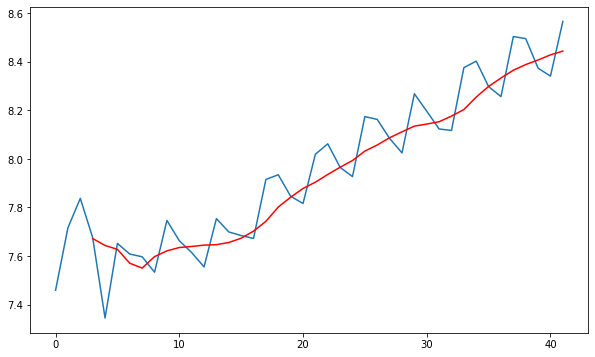

In [106]:
movingavg= indexeddf_logscale.rolling(window=4).mean()
movingstd= indexeddf_logscale.rolling(window=4).std()
plt.plot(indexeddf_logscale)
plt.plot(movingavg,color='red')

In [107]:
dfLogscaleMinusMovingAvg = indexeddf_logscale-movingavg
dfLogscaleMinusMovingAvg.head()

0         NaN
1         NaN
2         NaN
3    0.003501
4   -0.298911
Name: Sales, dtype: float64

In [108]:
dfLogscaleMinusMovingAvg.dropna(inplace=True)
dfLogscaleMinusMovingAvg

3     0.003501
4    -0.298911
5     0.024441
6     0.038063
7     0.046463
8    -0.064265
9     0.125428
10    0.028184
11   -0.025041
12   -0.089591
13    0.107470
14    0.043508
15    0.011111
16   -0.030088
17    0.172616
18    0.133040
19    0.003986
20   -0.061807
21    0.115244
22    0.126099
23   -0.000605
24   -0.066209
25    0.142358
26    0.105295
27   -0.002818
28   -0.086859
29    0.133311
30    0.053070
31   -0.029844
32   -0.059202
33    0.172672
34    0.148106
35   -0.000415
36   -0.076727
37    0.138661
38    0.107110
39   -0.033775
40   -0.087516
41    0.122067
Name: Sales, dtype: float64

In [109]:
def test_stationary(timeseries):
    
    # Determining rolling statistics
    movingAverage=timeseries.rolling(window=4).mean()
    movingSTD=timeseries.rolling(window=4).std()
    
    #Plotting the rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage,color='red', label='Rolling mean')
    std = plt.plot(movingSTD,color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Means & Rolling standard Deviation')
    plt.show(block=False)
    
    #Performing the Dickey-Fuller Test
    print("Results of dickey Fuller Test:")
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value

    print(dfoutput)

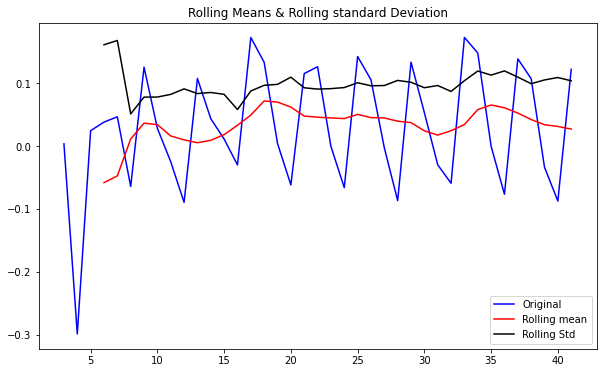

Results of dickey Fuller Test:
Test Statistics                -4.715896
p-value                         0.000079
#Lags Used                      4.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [110]:
test_stationary(dfLogscaleMinusMovingAvg)

From the graph, we can observe that the p-value is reduced from 0.99 to 0.000079 as well as the critical values at 1%, 5%, 10% are pretty close to the Test Statistics. Thus from this we can say that the time series is now stationary

# Exponential Decay Transformation

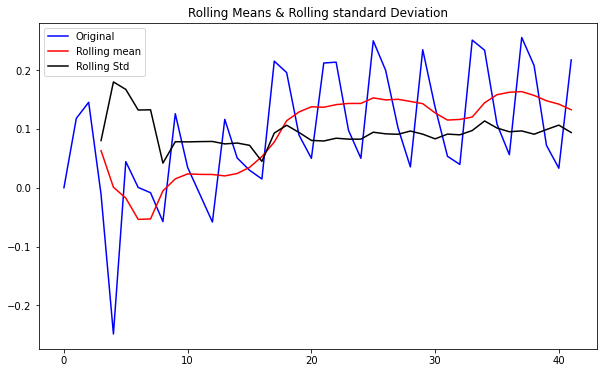

Results of dickey Fuller Test:
Test Statistics                -2.683387
p-value                         0.076957
#Lags Used                      6.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [111]:
expDecayWeightedAvg= indexeddf_logscale.ewm(halflife=4,min_periods=0).mean()
dfLogscaleminusexpDecay = indexeddf_logscale - expDecayWeightedAvg 
test_stationary(dfLogscaleminusexpDecay)

Here we can observe that p-value is higher than the previous transformation but the critical values at 
1%, 5% and 10% confidence intervals are pretty close to the test-statistics

# Time Shift Transformation 

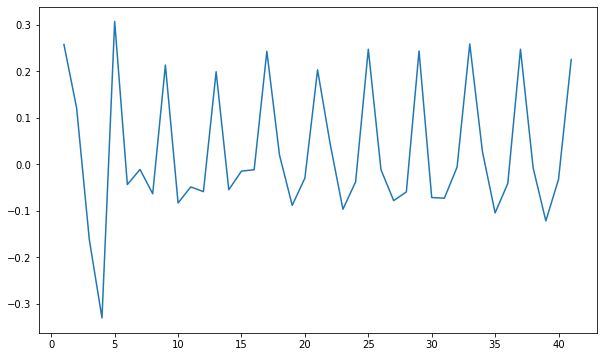

In [112]:
dfLogdiffShifting = indexeddf_logscale-indexeddf_logscale.shift()
plt.plot(dfLogdiffShifting)

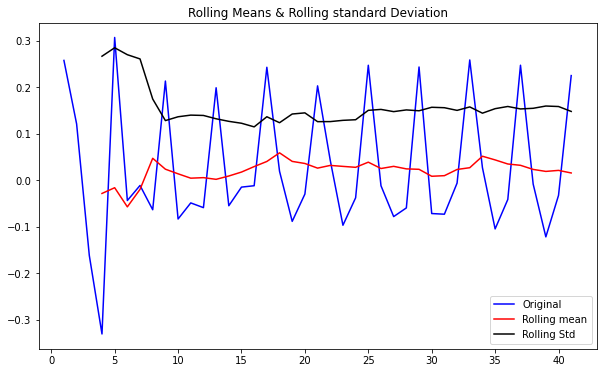

Results of dickey Fuller Test:
Test Statistics                -3.190392
p-value                         0.020548
#Lags Used                      6.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [113]:
dfLogdiffShifting.dropna(inplace=True)
test_stationary(dfLogdiffShifting)

Here the p-value is reduced from 0.07 to 0.02 but this is still higher than the log transformation p- value(0.000079). The critical values at 1%, 5% and 10% are also very close to test statistics and the rolling mean and rolling std lines in graph are also parallel to the x-axis. Therefore we'll choose Time shift transformed time series for our further processing 

# Plotting ACF and PACF

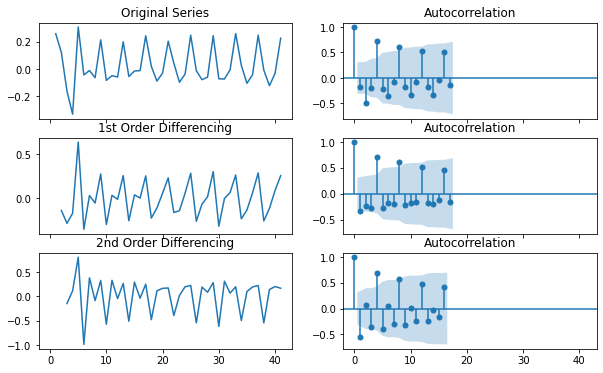

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dfLogdiffShifting); axes[0, 0].set_title('Original Series')
plot_acf(dfLogdiffShifting, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dfLogdiffShifting.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dfLogdiffShifting.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dfLogdiffShifting.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dfLogdiffShifting.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


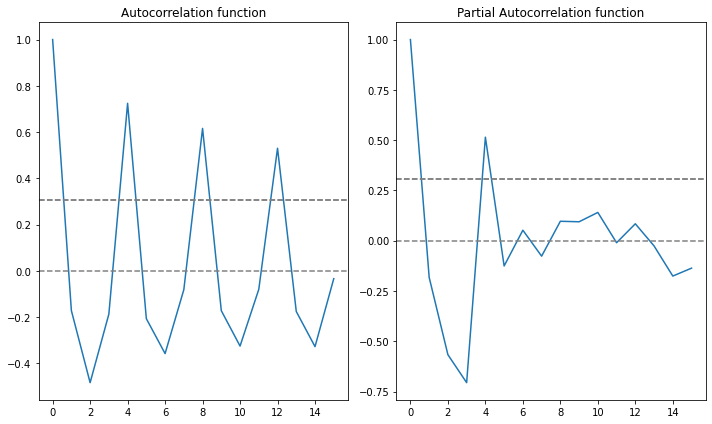

In [115]:
lag_acf = acf(dfLogdiffShifting,nlags=15)
lag_pacf = pacf(dfLogdiffShifting,nlags=15,method='ols')

#Plotting ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogdiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogdiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

#Plotting PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogdiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogdiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')

plt.tight_layout()

# Building Models

# AR Model

In [116]:
from statsmodels.tsa.arima_model import ARIMA

# 2,1,0 AR Model
model_AR = ARIMA(dfLogdiffShifting, order=(2,1,0))
model_AR_fit = model_AR.fit(disp=-1)
print(model_AR_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   40
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  10.590
Method:                       css-mle   S.D. of innovations              0.184
Date:                Tue, 26 Apr 2022   AIC                            -13.180
Time:                        12:43:29   BIC                             -6.424
Sample:                             1   HQIC                           -10.737
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0013      0.015     -0.084      0.933      -0.031       0.028
ar.L1.D.Sales    -0.5279      0.147     -3.595      0.000      -0.816      -0.240
ar.L2.D.Sales    -0.4483      0.146     

C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. 

Here you can see that the p-value is insignificant 

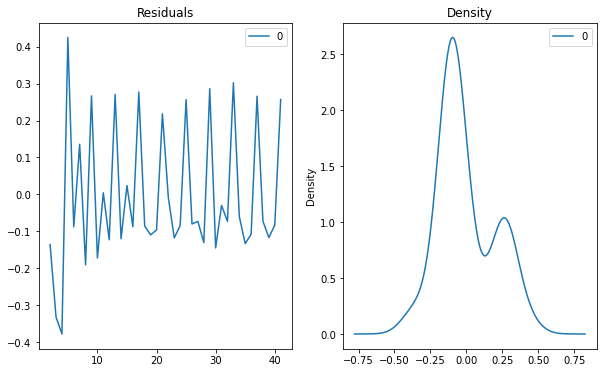

In [118]:
# Plot residual errors
residuals = pd.DataFrame(model_AR_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem to have higher fluctuations with near zero mean and the there isn't a uniform vairance 

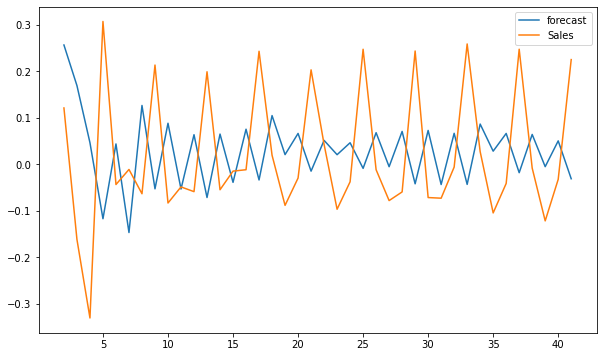

In [161]:
# Actual vs Fitted
model_AR_fit.plot_predict(dynamic=False)
plt.show()

# MA Model

In [119]:
# 0,1,2 MA Model
model_MA = ARIMA(dfLogdiffShifting, order=(0,1,2))
model_MA_fit = model_MA.fit(disp=-1)
print(model_MA_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   40
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  25.200
Method:                       css-mle   S.D. of innovations              0.115
Date:                Tue, 26 Apr 2022   AIC                            -42.399
Time:                        12:43:30   BIC                            -35.644
Sample:                             1   HQIC                           -39.957
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.000      2.092      0.036    4.32e-05       0.001
ma.L1.D.Sales    -1.8844      0.246     -7.653      0.000      -2.367      -1.402
ma.L2.D.Sales     0.8845      0.234     

C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. 

Here the models seems to have a significant p-value (0.03) which is less than 0.05 and also the AIC and BIC are lower comparatively to the previous AR model

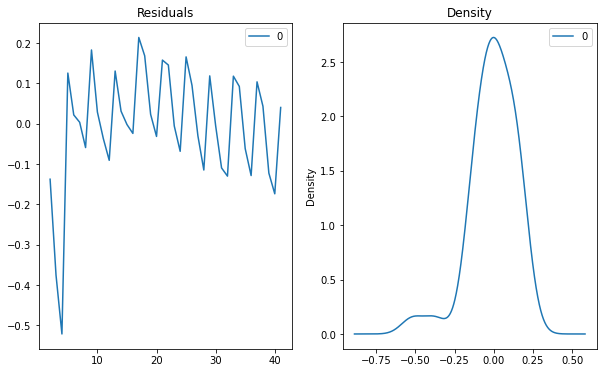

In [121]:
# Plot residual errors
residuals = pd.DataFrame(model_MA_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem to fluctuate less with the near zero mean and also there seems to have a little uniform vairance when compared with the previous model

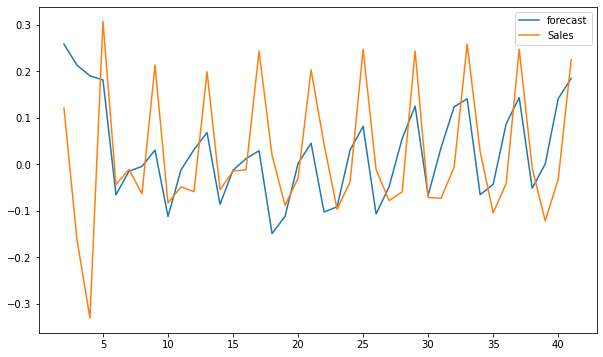

In [160]:
# Actual vs Fitted
model_MA_fit.plot_predict(dynamic=False)
plt.show()

# ARIMA Model(AR+MA)

In [122]:
# 2,1,2 ARIMA Model
model_ARIMA = ARIMA(dfLogdiffShifting, order=(2,1,2))
model_ARIMA_fit = model_ARIMA.fit(disp=-1)
print(model_ARIMA_fit.summary())

C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. 

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   40
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  32.874
Method:                       css-mle   S.D. of innovations              0.099
Date:                Tue, 26 Apr 2022   AIC                            -53.749
Time:                        12:43:31   BIC                            -43.616
Sample:                             1   HQIC                           -50.085
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.001      0.958      0.338      -0.001       0.004
ar.L1.D.Sales    -0.0022      0.148     -0.015      0.988      -0.292       0.287
ar.L2.D.Sales    -0.6494      0.131     

This models shows much lower AIC and BIC values as compared to previous two models but the p value here is insignificant. 

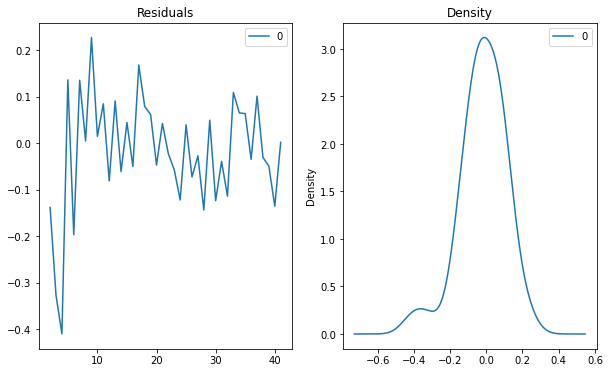

In [124]:
# Plot residual errors
residuals = pd.DataFrame(model_ARIMA_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residuals errors shows higher fluctuations with the near zero mean as compared to the MA model but the vairance seems little uniform like the previous MA model

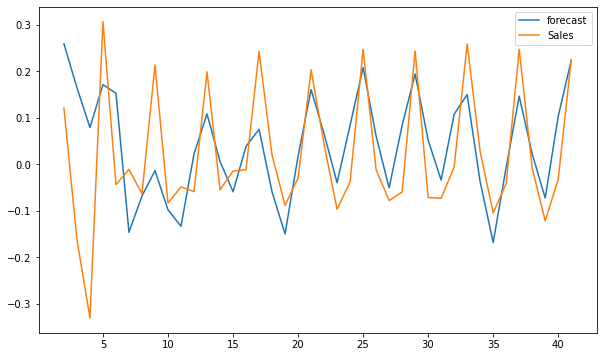

In [159]:
# Actual vs Fitted
model_ARIMA_fit.plot_predict(dynamic=False)
plt.show()

Here this model gives more close predictions when compared to the previous two models and also the AIC and BIC values are much lower amongst the three models.
but even though the p-value here is insignificant, but the predictions seem more stable than the AR and MA models, so the ARIMA model seems to be a good choice for the further model predictions 

# Predictions 

2    0.001179
3    0.043624
4    0.240794
5    0.502119
6   -0.154216
dtype: float64
Root Mean Square Error: 0.17343103435350696
Plotting ARIMA model


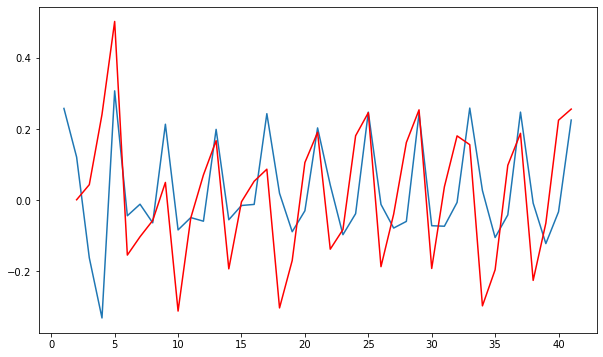

In [166]:
predictions_ARIMA_diff = pd.Series(model_ARIMA_fit.fittedvalues)
print(predictions_ARIMA_diff.head())
rmse = np.mean((predictions_ARIMA_diff - dfLogdiffShifting)**2)**.5 
print("Root Mean Square Error:",rmse)


plt.plot(dfLogdiffShifting)
plt.plot(predictions_ARIMA_diff, color='red')
print('Plotting ARIMA model')


# Hyperparamter Tuning for finding the best p,q and d values and building a good model for future predictions

In [152]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(dfLogdiffShifting, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3.862, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6.949, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5.861, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13.180, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-84.430, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-82.487, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-86.286, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-15.173, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-84.330, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.224 seconds
                               SARIMAX Results        

So from the above statistics we can see the best params for (p,q,d) values is (3,1,0) so we will use this and build the model and predict further

C:\Users\Tripti\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


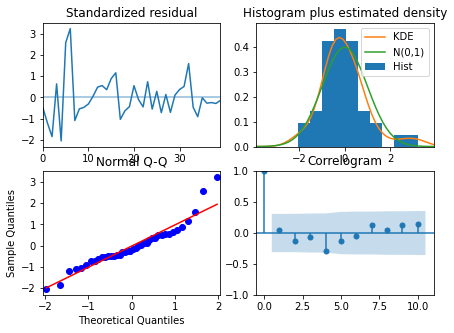

In [153]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

1. Standard residual graph - The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
2. Histogram plus estimated density - The density plot suggest normal distribution with mean zero.
3. Q-Q plot - All the dots fall almost nearer in line with the red line.
4. Correlogram - The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not seen in our graph above

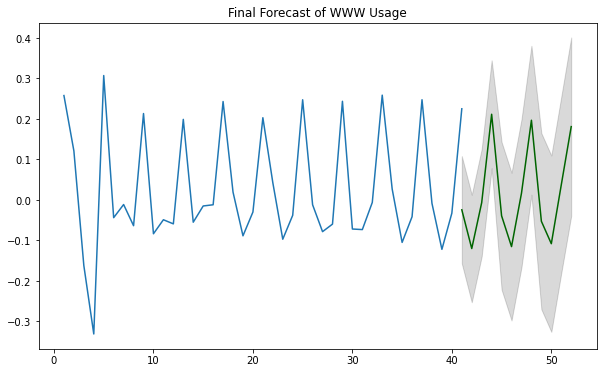

In [168]:
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(dfLogdiffShifting), len(dfLogdiffShifting)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(dfLogdiffShifting)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

Finally, overall this seems like a good fit as shown in the figure above